In [18]:
import os
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

#Sklearn imports(and othrs)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [22]:
#Load relevant data and create the full dataframe


filepath_met = "../linearmodel.parquet"

# read the Parquet file into a pandas dataframe
df = pq.read_pandas(filepath_met).to_pandas()

df

,Economically active: Employee: Full-time,Economically active: Employee: Part-time,Economically active: Full-time student,Economically active: Self-employed with employees: Full-time,Economically active: Self-employed with employees: Part-time,Economically active: Self-employed without employees: Full-time,Economically active: Self-employed without employees: Part-time,Economically active: Unemployed,Economically inactive: Long-term sick or disabled,Economically inactive: Looking after home or family,...,Golders Green,Hendon,High Barnet,Mill Hill,Totteridge & Woodside,Underhill,West Finchley,West Hendon,Whetstone,Woodhouse
0,0.399831,0.103973,0.024514,0.026205,0.007608,0.087067,0.065089,0.042265,0.021133,0.049873,...,False,False,True,False,False,False,False,False,False,False
1,0.399831,0.103973,0.024514,0.026205,0.007608,0.087067,0.065089,0.042265,0.021133,0.049873,...,False,False,True,False,False,False,False,False,False,False
2,0.399831,0.103973,0.024514,0.026205,0.007608,0.087067,0.065089,0.042265,0.021133,0.049873,...,False,False,True,False,False,False,False,False,False,False
3,0.399831,0.103973,0.024514,0.026205,0.007608,0.087067,0.065089,0.042265,0.021133,0.049873,...,False,False,True,False,False,False,False,False,False,False
4,0.399831,0.103973,0.024514,0.026205,0.007608,0.087067,0.065089,0.042265,0.021133,0.049873,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42506,0.392829,0.123928,0.046765,0.029618,0.004677,0.077942,0.045207,0.028839,0.017147,0.041309,...,False,False,False,False,False,True,False,False,False,False
42507,0.392829,0.123928,0.046765,0.029618,0.004677,0.077942,0.045207,0.028839,0.017147,0.041309,...,False,False,False,False,False,True,False,False,False,False
42508,0.392829,0.123928,0.046765,0.029618,0.004677,0.077942,0.045207,0.028839,0.017147,0.041309,...,False,False,False,False,False,True,False,False,False,False
42509,0.392829,0.123928,0.046765,0.029618,0.004677,0.077942,0.045207,0.028839,0.017147,0.041309,...,False,False,False,False,False,True,False,False,False,False


In [23]:

#Get the labels and features of the data
y = df['Crime ID_y']
X = df.drop(['Crime ID_y'], axis=1)

#scaler = StandardScaler()
#X_scaled = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)


#Train/test split


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42, shuffle=True) 

In [24]:
#Linera regression for the crimes in a ward

reg = LinearRegression().fit(X, y)

predictions = reg.predict(X)


score = reg.score(X, y)
MAE = sum(abs(predictions - y))/len(predictions)
MSE = sum((predictions - y)**2)/len(predictions)

In [26]:
reg.coef_

array([-1.43595775e+09, -1.43595775e+09, -1.43595776e+09, -1.43595775e+09,
       -1.43595776e+09, -1.43595775e+09, -1.43595775e+09, -1.43595775e+09,
       -1.43595776e+09, -1.43595775e+09, -1.43595774e+09, -1.43595776e+09,
       -1.43595775e+09, -7.58447647e-01, -2.55794346e-01,  1.75970256e+01,
       -4.34680700e-01, -9.86578041e+00,  1.20450381e+01, -2.21386217e+01,
       -1.50773972e+01,  8.01223171e+00,  2.14396429e+00, -8.12203407e-01,
       -9.07152295e-01, -1.30483145e+00, -4.12761784e+00,  1.11258039e+01,
        3.36085975e+00,  3.94908816e+00, -2.55125290e+00,  4.53448296e-03,
        2.72775173e-01, -2.82442570e-03,  5.05995750e-02, -2.00951099e-03,
        4.82665896e-02,  2.13438272e-03, -1.75460577e-02,  1.50999129e-02,
       -7.72812963e-03,  3.65189314e-02,  6.53785467e-02, -6.95581436e-02,
       -9.24395621e-02,  1.19189215e+00, -6.03174567e-02,  1.13338649e+00,
       -2.39024785e+00, -1.48352152e+00, -1.24924600e+00, -1.60821199e+00,
       -7.17873096e-01, -

Text(0.5, 1.0, 'Predicted mount of crimes per ward (R2=0.5519, MAE=4.3449, MSE=31.6499)')

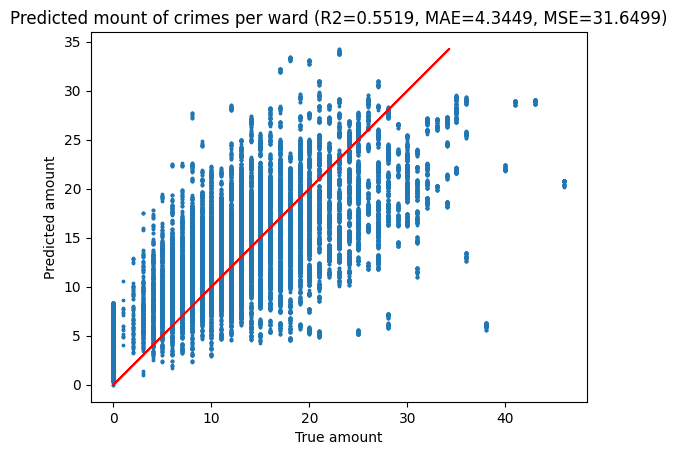

In [25]:
plt.scatter(y, predictions, s=3)

m, b = np.polyfit(predictions, y, 1)

plt.plot(predictions, m*predictions+b, c='r')

plt.xlabel('True amount')
plt.ylabel('Predicted amount')
plt.title(f'Predicted mount of crimes per ward (R2={score:.4f}, MAE={MAE:.4f}, MSE={MSE:.4f})')

Ideas:
-Binning for features
-Combining features
-clustering

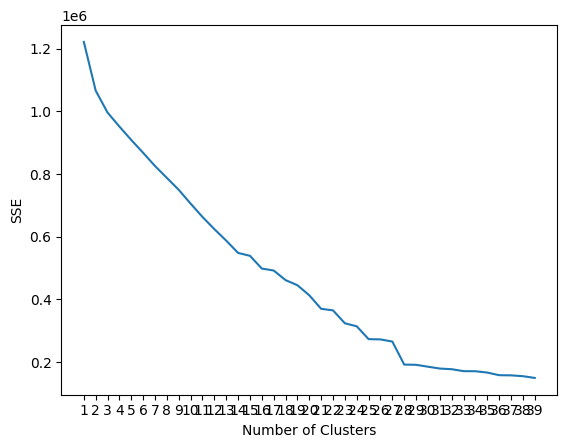

In [10]:
#Try to find clusters in the data
#The idea behind this is that there are hard to find patterns in the data and this way you can assign a burlary to similar ones

max_clusters = 40

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []


for k in range(1, max_clusters):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, max_clusters), sse)
plt.xticks(range(1, max_clusters))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [20]:
#From the plot above we conclude that 30 clusters is the optimal amont of clusters

kmeans = KMeans(n_clusters=30, **kmeans_kwargs)
kmeans.fit(X_scaled)
results = kmeans.labels_


#Add clusters to the dataframe

merged_df['cluster'] = results


#Plot the clusters on the map
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

m_4 = folium.Map(location=[51.655067,-0.205163], tiles='cartodbpositron', zoom_start=13)
	

# Add a bubble map to the base map
for i in range(0,100):
    Circle(
        location=[merged_df.iloc[i]['Latitude'], merged_df.iloc[i]['Longitude']],
        radius=20,
        label=merged_df.iloc[i]['cluster']).add_to(m_4)

# Display the map
m_4

In [13]:
"""
#Random forest classifier(for predicting in which ward crimes will take place doesnt work anymore)

rfc = RandomForestClassifier(random_state = 42)

rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
 
#Obtain accuracy

print("Test Score:",rfc.score(X_test,y_test))

conf_mat = confusion_matrix(y_test, y_pred)
#print(conf_mat)

import seaborn
import matplotlib.pyplot as plt
seaborn.heatmap(conf_mat)
plt.show()
"""

'\n#Random forest classifier(for predicting in which ward crimes will take place doesnt work anymore)\n\nrfc = RandomForestClassifier(random_state = 42)\n\nrfc.fit(X_train,y_train)\ny_pred = rfc.predict(X_test)\n \n#Obtain accuracy\n\nprint("Test Score:",rfc.score(X_test,y_test))\n\nconf_mat = confusion_matrix(y_test, y_pred)\n#print(conf_mat)\n\nimport seaborn\nimport matplotlib.pyplot as plt\nseaborn.heatmap(conf_mat)\nplt.show()\n'